In [1]:
#!/usr/bin/env julia

### This task is basis for other task. In this task we generate random circuit and get probability from several circuit widths and depths. For convenience, this code write on julia for the purpose of drawing result of several circuit easily.

## Preliminaries

### Import all necessary packages

In [2]:
using PastaQ
using PyPlot

### Call RndomCircuit.jl for generating and simulating quantum circuits.

In [3]:
include("RandomCircuit.jl")

run (generic function with 1 method)

### Choosing circuit width, depth and shots.

In [4]:
#For JULIA

#N = parse(Int, ARGS[1]) #number of qubit = width
#depth = parse(Int, ARGS[2]) #circuit depth
#nshots = parse(Int, ARGS[3])

In [5]:
N = 6
depth = 20
nshots = 1024

1024

### Generating and simulating quantum circuit.

In [6]:
gates = run(N, depth)

ITensors.MPS
[1] IndexSet{2} (dim=2|id=415|"Qubit,Site,n=1") (dim=2|id=410|"Link,fact")
[2] IndexSet{3} (dim=2|id=410|"Link,fact") (dim=2|id=148|"Qubit,Site,n=2") (dim=4|id=976|"Link,fact")
[3] IndexSet{3} (dim=2|id=500|"Qubit,Site,n=3") (dim=4|id=976|"Link,fact") (dim=8|id=241|"Link,fact")
[4] IndexSet{3} (dim=8|id=241|"Link,fact") (dim=2|id=111|"Qubit,Site,n=4") (dim=4|id=242|"Link,fact")
[5] IndexSet{3} (dim=2|id=420|"Qubit,Site,n=5") (dim=4|id=242|"Link,fact") (dim=2|id=116|"Link,fact")
[6] IndexSet{2} (dim=2|id=116|"Link,fact") (dim=2|id=971|"Qubit,Site,n=6")


### Get samples from result(gates) and extract valus from data(data type is pair)

In [7]:
data= getsamples(gates, nshots, local_basis = ["Z"])

1024×6 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>1
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
    ⋮                                       ⋮
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>

In [8]:
M = [x[2] for x in data] #from data(pari), we extract only value(not key) 

1024×6 Matrix{Int64}:
 0  0  0  1  1  1
 0  1  1  0  1  0
 1  0  1  1  1  1
 0  1  1  1  0  0
 0  0  1  1  0  0
 0  1  0  1  0  0
 1  1  0  0  1  1
 1  1  0  0  0  0
 0  0  0  1  0  0
 1  0  0  1  1  0
 0  1  1  1  0  1
 0  0  0  0  0  0
 0  0  1  1  1  0
 ⋮              ⋮
 0  1  1  0  1  1
 0  1  1  0  0  1
 1  1  1  0  0  1
 0  1  0  0  0  0
 1  0  0  0  0  0
 0  1  1  0  1  1
 1  1  1  0  1  1
 0  1  1  0  0  1
 0  1  1  0  1  1
 0  1  0  0  1  1
 1  0  0  0  0  0
 0  0  1  1  1  0

### For convennience, we transform binary results into decimal results

In [9]:
A = zeros(Int64, nshots) #string for saving decimal number transforming from binary 

# Binary to Decimal
for i in 1:nshots
    for j in 1:N
        A[i] += 2^(j-1)*M[i,j]
    end
end

### We count the number of each decimal data and convert it into probability.

In [10]:
Pr = zeros(Int,2^N) #we counts number of each binary number from string A, and save that number at Pr in order.

for i in 1:nshots
    Pr[A[i] + 1] += 1
end

Pr_1 = zeros(2^N) #Pr_1 is probability from Pr.(Pr[i]/nshots)

for i in 1:2^N
    Pr_1[i]=Pr[i]/nshots
end

### Plot speckle pattern using pyPlot. Draw various circuits can done by iterating this code.

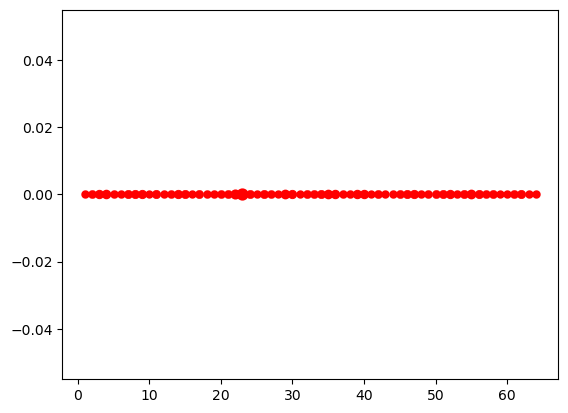

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [11]:
# plot speckle pattern using PyPlot
for i in 1:2^N
    plt.scatter(i,0,color="red",linewidth=25.0*Pr_1[i])    
end
show()

savefig("task1_result_width6_depth20.pdf")